## Problem 4: Neural Network

Consider a 2-layer feed-forward neural network that takes in $x \in \mathbb {R}^2$ and has two ReLU hidden units as defined in the figure below. Note that hidden units have no offset parameters in this problem.

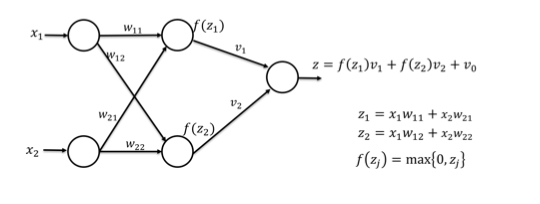

To analyze and understand the 2-layer feed-forward neural network shown in the provided diagram, we can break it down step by step.

### Network Description

The network has the following components:

- **Input Layer**: $ x = \begin{bmatrix} x_1 & x_2 \end{bmatrix} $
- **Hidden Layer**: 2 ReLU units
  - $ z_1 = x_1 w_{11} + x_2 w_{21} $
  - $ z_2 = x_1 w_{12} + x_2 w_{22} $
  - $ f(z_i) = \max(0, z_i) $ (ReLU activation function)
- **Output Layer**:
  - $ v_1, v_2 $: Weights for the hidden units
  - $ v_0 $: Bias for the output unit
  - $ z = f(z_1)v_1 + f(z_2)v_2 + v_0 $

### Steps to Compute the Output

1. **Compute $ z_1 $ and $ z_2 $**:
   $$
   z_1 = x_1 w_{11} + x_2 w_{21}
   $$
   $$
   z_2 = x_1 w_{12} + x_2 w_{22}
   $$

2. **Apply the ReLU activation function**:
   $$
   f(z_1) = \max(0, z_1)
   $$
   $$
   f(z_2) = \max(0, z_2)
   $$

3. **Compute the final output**:
   $$
   z = f(z_1)v_1 + f(z_2)v_2 + v_0
   $$

### Example Calculation

Let's consider an example with specific values for the weights, inputs, and bias:

- Inputs: $ x_1 = 1 $, $ x_2 = 2 $
- Weights: $ w_{11} = 0.5 $, $ w_{12} = -0.5 $, $ w_{21} = 1.0 $, $ w_{22} = 1.0 $
- Output layer weights: $ v_1 = 1.0 $, $ v_2 = -1.0 $
- Bias: $ v_0 = 0.5 $

### Calculation

1. **Compute $ z_1 $ and $ z_2 $**:
   $$
   z_1 = 1 \cdot 0.5 + 2 \cdot 1.0 = 0.5 + 2.0 = 2.5
   $$
   $$
   z_2 = 1 \cdot (-0.5) + 2 \cdot 1.0 = -0.5 + 2.0 = 1.5
   $$

2. **Apply the ReLU activation function**:
   $$
   f(z_1) = \max(0, 2.5) = 2.5
   $$
   $$
   f(z_2) = \max(0, 1.5) = 1.5
   $$

3. **Compute the final output**:
   $$
   z = 2.5 \cdot 1.0 + 1.5 \cdot (-1.0) + 0.5 = 2.5 - 1.5 + 0.5 = 1.5
   $$

z1 = 2.5
z2 = 1.5
f(z1) = 2.5
f(z2) = 1.5
Output = 1.5


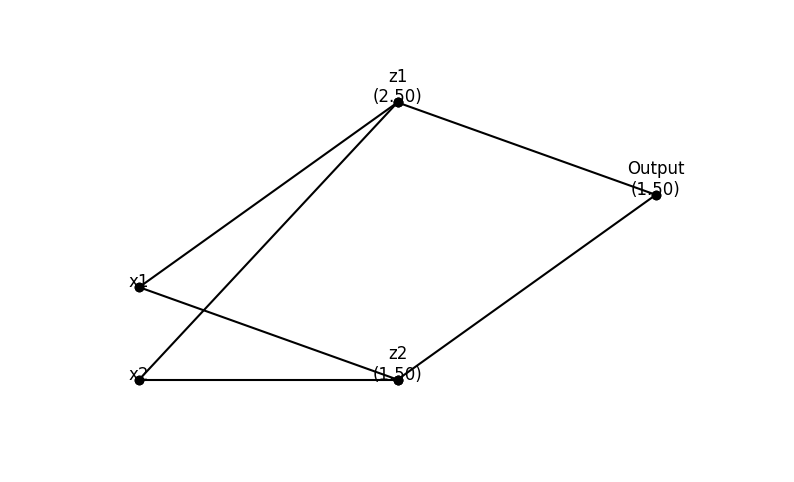

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the inputs
x1 = 1
x2 = 2

# Define the weights
w11 = 0.5
w12 = -0.5
w21 = 1.0
w22 = 1.0

# Define the output layer weights
v1 = 1.0
v2 = -1.0
v0 = 0.5

# Compute z1 and z2
z1 = x1 * w11 + x2 * w21
z2 = x1 * w12 + x2 * w22

# Apply ReLU activation function
f_z1 = relu(z1)
f_z2 = relu(z2)

# Compute the final output
output = f_z1 * v1 + f_z2 * v2 + v0

# Print the results
print(f"z1 = {z1}")
print(f"z2 = {z2}")
print(f"f(z1) = {f_z1}")
print(f"f(z2) = {f_z2}")
print(f"Output = {output}")

# Plotting the network
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [2, 4], 'ko-')  # x1 to z1
ax.plot([0, 1], [2, 1], 'ko-')  # x1 to z2
ax.plot([0, 1], [1, 4], 'ko-')  # x2 to z1
ax.plot([0, 1], [1, 1], 'ko-')  # x2 to z2

ax.plot([1, 2], [4, 3], 'ko-')  # z1 to output
ax.plot([1, 2], [1, 3], 'ko-')  # z2 to output

ax.text(0, 2, 'x1', fontsize=12, ha='center')
ax.text(0, 1, 'x2', fontsize=12, ha='center')
ax.text(1, 4, f'z1\n({z1:.2f})', fontsize=12, ha='center')
ax.text(1, 1, f'z2\n({z2:.2f})', fontsize=12, ha='center')
ax.text(2, 3, f'Output\n({output:.2f})', fontsize=12, ha='center')

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 5)
ax.axis('off')
plt.show()

### ⭕️ If we keep the hidden layer parameters above fixed but add and train additional hidden layers (applied after this layer) to further transform the data, could the resulting neural network solve this classification problem?

#### ⭐️🔰💡 Solution appraoch

Yes, adding and training additional hidden layers after the fixed hidden layer can help the neural network solve the classification problem. Here's why:

1. **Initial Layer Transformations**:
   - The first layer (the one we've analyzed with $ z_1 $ and $ z_2 $) transforms the input space $(x_1, x_2)$ into a new space $(f(z_1), f(z_2))$.
   - This transformation already captures some non-linear relationships in the data, separating it into different regions.

2. **Subsequent Layers**:
   - Additional hidden layers can further transform the already mapped space $(f(z_1), f(z_2))$.
   - Each subsequent layer can apply more complex, non-linear transformations to these intermediate features.
   - These layers can learn to combine the features in $(f(z_1), f(z_2))$ space in ways that create more complex decision boundaries.

### Example

Let's say we have the following setup:

1. **First Layer**: Two neurons with ReLU activations, transforming the input $(x_1, x_2)$ to $(f(z_1), f(z_2))$.
2. **Second Layer**: Additional neurons that take $(f(z_1), f(z_2))$ as input.

The second layer can learn to create new combinations of $f(z_1)$ and $f(z_2)$ to better capture the separation between classes.

**Example Code:** In this code, we train an MLP classifier with two hidden layers. The first layer has 2 neurons (corresponding to our initial transformation), and the second layer has 10 neurons. The decision boundary plot will show how the additional layers help separate the classes more effectively.

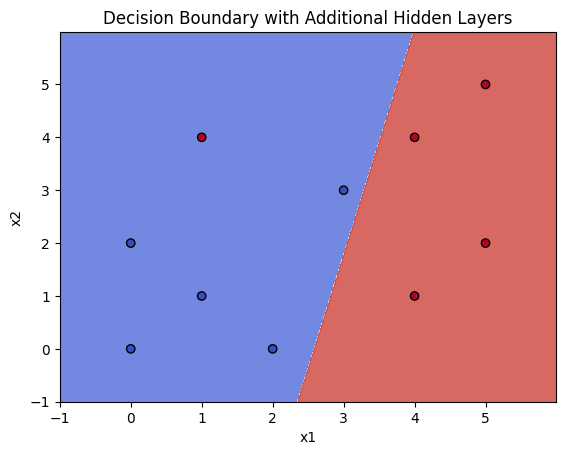

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Example data
X = np.array([[0, 0], [2, 0], [1, 1], [0, 2], [3, 3], [4, 1], [5, 2], [1, 4], [4, 4], [5, 5]])
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

# Convert labels to 0 and 1 for sklearn
y = (y == 1).astype(int)

# Train a neural network with one hidden layer with 2 neurons and another hidden layer with more neurons
mlp = MLPClassifier(hidden_layer_sizes=(2, 10), activation='relu', max_iter=1000, random_state=1)
mlp.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary with Additional Hidden Layers')
plt.show()

### ⭕️ Suppose we stick to the 2-layer architecture but add many more ReLU hidden units, all of them without offset parameters. Would it be possible to train such a model to perfectly separate these points?

Note : Assume that no 2 data points lie on the same line through the origin.

#### ⭐️🔰💡 Solution appraoch
Yes, it is possible to train a 2-layer neural network with many ReLU hidden units (without offset parameters) to perfectly separate the given points, under the assumption that no two data points lie on the same line through the origin. Here’s a detailed explanation:

1. **ReLU Activation**:
   - The ReLU function $ f(z) = \max(0, z) $ introduces non-linearity, enabling the network to create complex decision boundaries by combining multiple linear segments.

2. **Increased Capacity with More Units**:
   - Adding more hidden units increases the network’s capacity to represent more complex patterns.
   - Each hidden unit can define a different linear boundary, and their combination can form arbitrary shapes necessary to separate the data points.

3. **Piecewise Linear Boundaries**:
   - A network with $ n $ ReLU hidden units can represent a decision boundary as a piecewise linear function with up to $ 2^n $ linear segments.
   - With enough hidden units, the network can create a highly flexible decision boundary that can adapt to the specific distribution of the points.

4. **Training**:
   - The network's weights must be properly adjusted during training to achieve the desired separation.
   - This requires an appropriate optimization algorithm (e.g., gradient descent) and sufficient training iterations.

5. **No Two Points on the Same Line**:
   - The assumption that no two data points lie on the same line through the origin ensures that each point can be uniquely classified by a combination of the ReLU activations.
   - This uniqueness simplifies the problem for the neural network, as it avoids degenerate cases where points are linearly dependent.



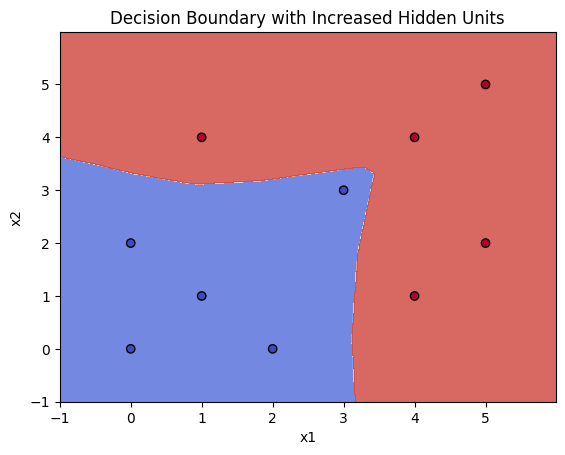

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Example data
X = np.array([[0, 0], [2, 0], [1, 1], [0, 2], [3, 3], [4, 1], [5, 2], [1, 4], [4, 4], [5, 5]])
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

# Convert labels to 0 and 1 for sklearn
y = (y == 1).astype(int)

# Train a neural network with one hidden layer with many more neurons
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=10000, random_state=1)
mlp.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary with Increased Hidden Units')
plt.show()


#### Explanation

- **Data**: The synthetic dataset consists of points $(x_1, x_2)$ with binary labels.
- **Model**: A 2-layer MLP with 50 ReLU hidden units.
- **Training**: The model is trained to minimize classification error.
- **Plotting**: The decision boundary is plotted to visualize how the network classifies the points.

### Conclusion

Given that no two points lie on the same line through the origin, and with a sufficient number of ReLU hidden units, a 2-layer neural network can be trained to perfectly separate the points. This leverages the capacity of the ReLU units to form complex, piecewise linear decision boundaries that can fit the data accurately.

### ⭕️ Which of the following statements is correct?

1. **The gradient calculated in the backpropagation algorithm consists of the partial derivatives of the loss function with respect to each network weight.**
   
   - **Correct**: This is a fundamental aspect of backpropagation. The gradient consists of the partial derivatives of the loss function with respect to each weight.

2. **Initialization of the parameters is often important when training large feed-forward neural networks. If weights in a neural network with sigmoid units are initialized to close to zero values, then during early stochastic gradient descent steps, the network represents a nearly linear function of the inputs.**
   
   - **Correct**: Proper initialization is crucial, and initializing weights to values close to zero results in the sigmoid units operating in their nearly linear region around zero.

3. **On the other hand, if we randomly set all the weights to very large values, or don't scale them properly with the number of units in the layer below, then the sigmoid units would behave like sign units. Here, “behave like sign units" allows for shifting or rescaling of the sign function. (Note that a sign unit is a unit with activation function $\text {sign}(x)=1$ if $x>0$ and $\text {sign}(x)=-1$ if $x<0$. For the purpose of this question, it does not matter what $\text {sign}(0)$ is.)**
   
   - **Correct**: Large weights cause the sigmoid function to saturate, making it behave like a sign function.

4. **If we use only sign units in a feedforward neural network, then the stochastic gradient descent update will:**
   - **(a) almost never change any of the weights** 
   - **(b) change the weights by large amounts at random**
   
   - **Correct Option (a)**: Stochastic gradient descent relies on gradients to update the weights. Since the gradient of the sign function is zero almost everywhere, the weights would almost never change, making option (a) correct. Option (b) is incorrect because the weights do not change by large amounts at random in this context.

5. **Stochastic gradient descent differs from (true) gradient descent by updating only one network weight during each gradient descent step.**
   
   - **Incorrect**: Stochastic gradient descent updates all weights based on a single training example (or a mini-batch), not just one weight.

### ⭕️ Answer True or False

1. **There are many good reasons to use convolutional layers in CNNs as opposed to replacing them with fully connected layers. Since we apply the same convolutional filter throughout the image, we can learn to recognize the same feature wherever it appears.**
   
   - **True**: This is one of the main advantages of convolutional layers. The use of shared weights in convolutional layers allows the network to detect features regardless of their position in the input image, providing translational invariance.

2. **A fully connected layer for an image has more parameters than the size of the image.**
   
   - **True**: A fully connected layer connects every neuron in one layer to every neuron in the next layer. For an image, this means a very large number of parameters since each pixel would connect to every neuron in the next layer, resulting in a number of parameters that is much larger than the size of the image.

3. **A fully connected layer can learn to recognize features anywhere in the image even if the features appeared preferentially in one location during training.**
   
   - **False**: Fully connected layers do not have the property of translational invariance. If a feature appears preferentially in one location during training, a fully connected layer may not generalize well to recognizing that feature in different locations, unlike convolutional layers.